In [1]:
# 0. 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# 1. 데이터 로드
df_ab = pd.read_csv('../data/ab_data.csv')
df_ct = pd.read_csv('../data/countries.csv')

# 데이터 합치기
df = pd.merge(df_ab, df_ct, on='user_id', how='left')
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294482 entries, 0 to 294481
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294482 non-null  int64 
 1   timestamp     294482 non-null  object
 2   group         294482 non-null  object
 3   landing_page  294482 non-null  object
 4   converted     294482 non-null  int64 
 5   country       294482 non-null  object
dtypes: int64(2), object(4)
memory usage: 13.5+ MB


(   user_id timestamp      group landing_page  converted country
 0   851104   11:48.6    control     old_page          0      US
 1   804228   01:45.2    control     old_page          0      US
 2   661590   55:06.2  treatment     new_page          0      US
 3   853541   28:03.1  treatment     new_page          0      US
 4   864975   52:26.2    control     old_page          1      US,
 None)

In [2]:
# 2. 전처리: 실험 누락/오염 레코드 제거
mask = ((df.group == 'control') & (df.landing_page != 'old_page')) | \
       ((df.group == 'treatment') & (df.landing_page != 'new_page'))
print("오염된 레코드 수:", mask.sum())
df = df.loc[~mask].copy()

# 3. 기본 통계치 확인
print(df.describe(include='all'))
print(df['country'].value_counts())
print(df['group'].value_counts())
print(df['converted'].value_counts())


오염된 레코드 수: 3893
              user_id timestamp      group landing_page      converted country
count   290589.000000    290589     290589       290589  290589.000000  290589
unique            NaN     35991          2            2            NaN       3
top               NaN   33:53.2  treatment     new_page            NaN      US
freq              NaN        22     145315       145315            NaN  203624
mean    788004.037913       NaN        NaN          NaN       0.119595     NaN
std      91224.393160       NaN        NaN          NaN       0.324488     NaN
min     630000.000000       NaN        NaN          NaN       0.000000     NaN
25%     709035.000000       NaN        NaN          NaN       0.000000     NaN
50%     787992.000000       NaN        NaN          NaN       0.000000     NaN
75%     866955.000000       NaN        NaN          NaN       0.000000     NaN
max     945999.000000       NaN        NaN          NaN       1.000000     NaN
country
US    203624
UK     72466
CA

C:\Users\zxcvz\AppData\Local\Temp\ipykernel_25212\1006360032.py:9: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) Arial.
  plt.savefig('../outputs/figures/1_group_conversion.png')
C:\Users\zxcvz\AppData\Local\Temp\ipykernel_25212\1006360032.py:9: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from font(s) Arial.
  plt.savefig('../outputs/figures/1_group_conversion.png')
C:\Users\zxcvz\AppData\Local\Temp\ipykernel_25212\1006360032.py:9: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) Arial.
  plt.savefig('../outputs/figures/1_group_conversion.png')
C:\Users\zxcvz\AppData\Local\Temp\ipykernel_25212\1006360032.py:9: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) Arial.
  plt.savefig('../outputs/figures/1_group_conversion.png')
C:\Users\zxcvz\AppData\Local\Temp\ipykernel_25212\1006360032.py:17: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) Arial.
  plt.savefig('../outputs/fi

KeyError: 'session_time'

C:\Users\zxcvz\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zxcvz\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zxcvz\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zxcvz\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


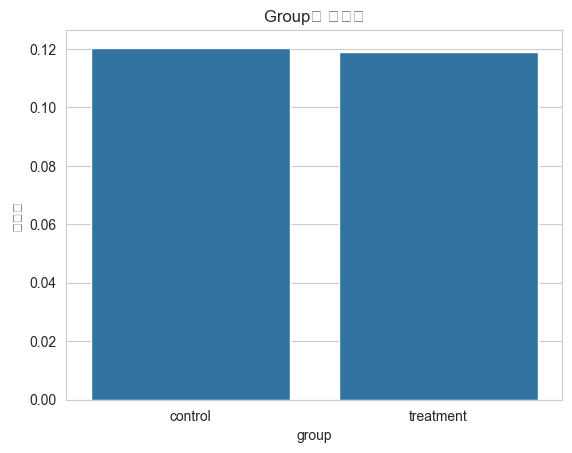

C:\Users\zxcvz\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zxcvz\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zxcvz\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zxcvz\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47353 (\N{HANGUL SYLLABLE RUB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zxcvz\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.

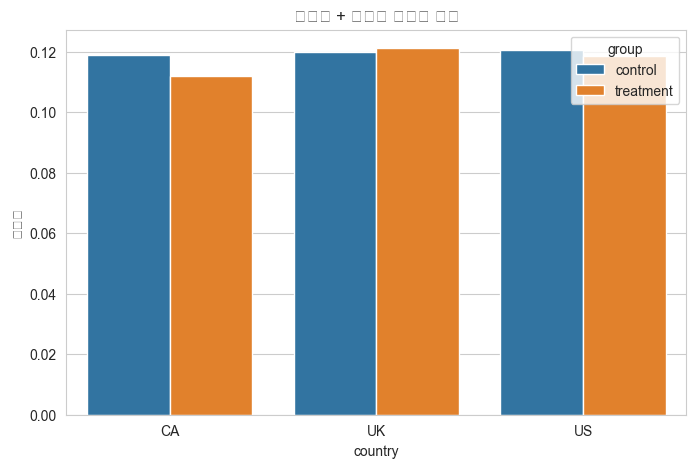

In [3]:
import os
os.makedirs('../outputs/figures', exist_ok=True)

# 4. 전환률 분석
convert_rate = df.groupby('group')['converted'].mean().reset_index()
sns.barplot(data=convert_rate, x='group', y='converted')
plt.title('Group별 전환율')
plt.ylabel('전환율')
plt.savefig('../outputs/figures/1_group_conversion.png')

# 5. 국가별/그룹별 전환율
ct = df.groupby(['country','group'])['converted'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=ct, x='country', y='converted', hue='group')
plt.title('국가별 + 그룹별 전환율 비교')
plt.ylabel('전환율')
plt.savefig('../outputs/figures/2_country_group_conv.png')

# 6. 세션 시간 전처리 & 분포 확인
def mmss_to_sec(x):
    m, s = x.split(':')
    return int(m)*60 + float(s)
df['session_sec'] = df['session_time'].apply(mmss_to_sec)

plt.figure(figsize=(8,5))
sns.histplot(df['session_sec'], bins=50, kde=True)
plt.title('세션 시간 분포 (초 단위)')
plt.xlabel('seconds')
plt.savefig('../outputs/figures/3_session_time_dist.png')


C:\Users\zxcvz\AppData\Local\Temp\ipykernel_25212\3336513959.py:9: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) Arial.
  plt.savefig('../outputs/figures/4_group_conversion.png')
C:\Users\zxcvz\AppData\Local\Temp\ipykernel_25212\3336513959.py:9: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) Arial.
  plt.savefig('../outputs/figures/4_group_conversion.png')
C:\Users\zxcvz\AppData\Local\Temp\ipykernel_25212\3336513959.py:9: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) Arial.
  plt.savefig('../outputs/figures/4_group_conversion.png')
C:\Users\zxcvz\AppData\Local\Temp\ipykernel_25212\3336513959.py:9: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) Arial.
  plt.savefig('../outputs/figures/4_group_conversion.png')
C:\Users\zxcvz\AppData\Local\Temp\ipykernel_25212\3336513959.py:9: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from font(s) Arial.
  plt.savefig('../outputs/

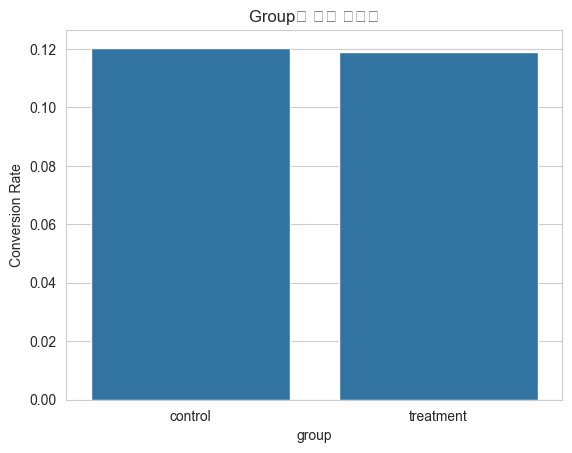

C:\Users\zxcvz\AppData\Local\Temp\ipykernel_25212\3336513959.py:18: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) Arial.
  plt.savefig('../outputs/figures/5_country_group_conversion.png')
C:\Users\zxcvz\AppData\Local\Temp\ipykernel_25212\3336513959.py:18: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) Arial.
  plt.savefig('../outputs/figures/5_country_group_conversion.png')
C:\Users\zxcvz\AppData\Local\Temp\ipykernel_25212\3336513959.py:18: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) Arial.
  plt.savefig('../outputs/figures/5_country_group_conversion.png')
C:\Users\zxcvz\AppData\Local\Temp\ipykernel_25212\3336513959.py:18: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) Arial.
  plt.savefig('../outputs/figures/5_country_group_conversion.png')
C:\Users\zxcvz\AppData\Local\Temp\ipykernel_25212\3336513959.py:18: UserWarning: Glyph 47353 (\N{HANGUL SYLLABLE RUB}) missing from font(s) Ari

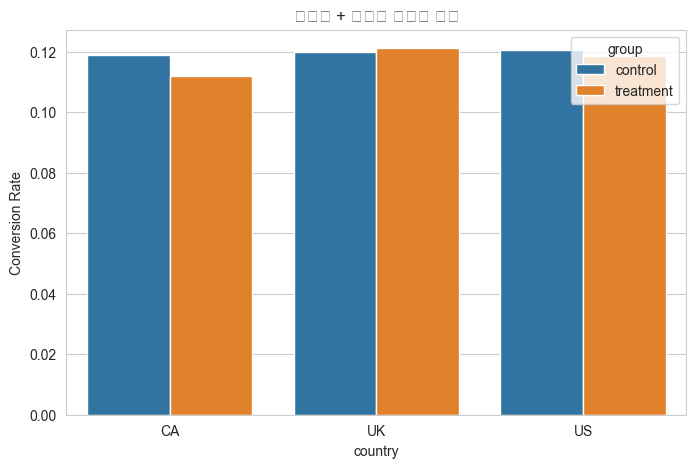

🔎 국가별 샘플 수:
country
US    203624
UK     72466
CA     14499
Name: count, dtype: int64

📊 그룹별 전환율 (%):
group
control      12.038630
treatment    11.880398
Name: converted, dtype: float64

🌍 국가+그룹별 전환율 (%):
group      control  treatment
country                      
CA       11.878300  11.190248
UK       12.002200  12.117100
US       12.062999  11.845979


In [4]:

# 저장 디렉토리 확인
os.makedirs('../outputs/figures', exist_ok=True)

# 7. 그룹별 전환율 박스플롯 (converted는 이진값이므로 박스플롯보단 평균 표시가 나음)
conversion_rate = df.groupby('group')['converted'].mean().reset_index()
sns.barplot(data=conversion_rate, x='group', y='converted')
plt.title('Group별 평균 전환율')
plt.ylabel('Conversion Rate')
plt.savefig('../outputs/figures/4_group_conversion.png')
plt.show()

# 8. 국가별 그룹 전환율 시각화
country_group_conv = df.groupby(['country', 'group'])['converted'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=country_group_conv, x='country', y='converted', hue='group')
plt.title('국가별 + 그룹별 전환율 비교')
plt.ylabel('Conversion Rate')
plt.savefig('../outputs/figures/5_country_group_conversion.png')
plt.show()

# 9. 요약 정보 출력
print("🔎 국가별 샘플 수:")
print(df['country'].value_counts())

print("\n📊 그룹별 전환율 (%):")
print(df.groupby('group')['converted'].mean() * 100)

print("\n🌍 국가+그룹별 전환율 (%):")
print(country_group_conv.pivot(index='country', columns='group', values='converted') * 100)

In [5]:
# 10. EDA 요약 노트
"""
1. 각 그룹의 전환율 차이는?
2. 국가별/그룹별 전환율 차이 존재하는가?
3. 세션 시간 분포 및 군집 차이 유의한가?
4. 이상치 존재 시 제외 처리 또는 보정 필요
"""


'\n1. 각 그룹의 전환율 차이는?\n2. 국가별/그룹별 전환율 차이 존재하는가?\n3. 세션 시간 분포 및 군집 차이 유의한가?\n4. 이상치 존재 시 제외 처리 또는 보정 필요\n'